# Classification report generator

All in one classification tester generates reports 

## History 

### SMA analysis results:

Model score: 0.9640625

|           |   precision  |  recall | f1-score  | support|
| ---: | :---:|:---:|:---:|:---:|
|           0 |      0.96 |     1.00    |  0.98   |   5475 |
|           1 |      0.94 |     0.29    |  0.45   |    285 |
|||||
|    accuracy |           |             |  0.96   |   5760|
|   macro avg |      0.95 |     0.65    |  0.71   |   5760|
|weighted avg |      0.96 |     0.96    |  0.95   |   5760|


- accuracy: 0.9356250000000002
- precision: 0.14149963865126186
- recall: 0.05499903213317847
- f1: 0.07385725755280738

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Functions and constants
# Put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

def generate_report(X_train, X_test, y_train, y_test):
    """
    renerates report with default RandomForestClassifier paramaters
    """
    np.random.seed(42)
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    print(f"Model score: {model.score(X_test, y_test)}")
    plot_roc_curve(model, X_test, y_test)
    plot_conf_mat(y_test, y_preds)
    print(classification_report(y_test, y_preds))
    
    print("===========CROSS VALIDATED METRICS===========")
    print(f"accuracy: {cross_validated_metric(model, 'accuracy')}")
    print(f"precision: {cross_validated_metric(model, 'precision')}")
    print(f"recall: {cross_validated_metric(model, 'recall')}")
    print(f"f1: {cross_validated_metric(model, 'f1')}")
    
    print("Fact sheet:")
    print("Accuracy:")
    print("Precision: Portion of guessed positives that are actually correct")
    print("Recall: Portion of actual positives that are guessed correct")
    print("F1: Balance, use if uneven class distribution (ie large # actual negatives)")
          
    
    print("===========FEATURE IMPORTANCE===========")
    feature_dict = dict(zip(X_train.columns, list(model.feature_importances_)))
    feature_df = pd.DataFrame(feature_dict, index=[0])
    feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(10, 6));
    
    

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    sns.set(font_scale = 1.5)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    
def cross_validated_metric(model, metric:str)->float:
    """
    returns the cross-validated (5) metric for any valid metric
    Common accepted ones: 
     - 'accuracy'
     - 'precision'
     - 'recall'
     - 'f1'
     """
    cv_metric = cross_val_score(model, X, y, cv=5, scoring=metric)
    return np.mean(cv_metric)

## Import file

In [3]:
df = pd.read_csv("data/testt.csv")
close = pd.read_csv("data/classification_test.csv")
close = close[29000:]
df_ft = df[29000:]
df_ft = df_ft.dropna()
df = df[0:29000] #To not forward test
df = df.dropna()
df

,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,target
0,4.301206e+02,-74.535483,0.127313,20.182216,64.688170,-3.422322e+09,3.071359e+10,0.026986,9.906971e+02,0
1,4.300001e+02,-75.344726,0.178126,17.111760,69.133393,-3.390650e+09,3.287783e+10,-0.002855,9.906971e+02,0
2,4.311024e+02,-64.601670,0.156695,52.129794,85.855556,1.097238e+10,3.596774e+10,0.063750,9.906971e+02,0
3,4.336960e+02,-67.517221,0.201195,43.849666,79.962643,-1.898240e+10,3.671857e+10,0.062654,9.902158e+02,0
4,4.475725e+02,-53.381161,0.304989,119.291855,83.517756,1.046366e+10,3.556394e+10,0.137560,9.902158e+02,0
...,...,...,...,...,...,...,...,...,...,...
28995,2.798417e+06,186977.990096,0.196261,11220.876734,44.319378,-1.679964e+08,-4.967971e+06,-1.922946,1.071883e+06,0
28996,2.798883e+06,185618.851195,0.194315,7629.668294,49.221069,6.252488e+07,-7.020568e+06,1.602651,1.071312e+06,0
28997,2.800099e+06,186936.220543,0.166684,24243.277761,47.803128,4.601805e+08,1.240679e+07,5.730584,1.076561e+06,0
28998,2.800030e+06,184053.848524,0.190088,13055.195356,56.725389,1.672769e+08,2.578684e+07,3.652252,1.076561e+06,0


In [4]:
# Split data into X and y
X = df.drop(["target"], axis=1)
# X = df[["volume_adi", "volume_obv", "volume_nvi", "volatility_atr", "volatility_bbh", "others_cr"]].copy()
y = df["target"]

# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

Model score: 0.973448275862069
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5534
           1       0.92      0.46      0.61       266

    accuracy                           0.97      5800
   macro avg       0.95      0.73      0.80      5800
weighted avg       0.97      0.97      0.97      5800

===========CROSS VALIDATED METRICS===========
accuracy: 0.591793103448276


/Volumes/Storage/Programming/bitcoin-printer/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision: 0.03951039687633073
recall: 0.3103782364872927
f1: 0.05648586450877391
Fact sheet:
Accuracy:
Precision: Portion of guessed positives that are actually correct
Recall: Portion of actual positives that are guessed correct
F1: Balance, use if uneven class distribution (ie large # actual negatives)
===========FEATURE IMPORTANCE===========


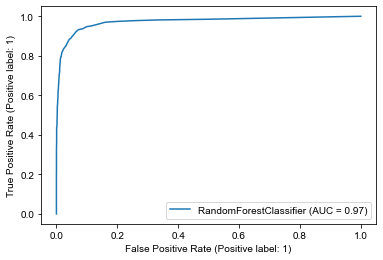

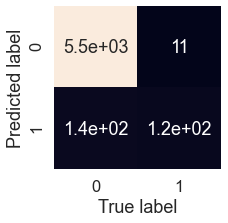

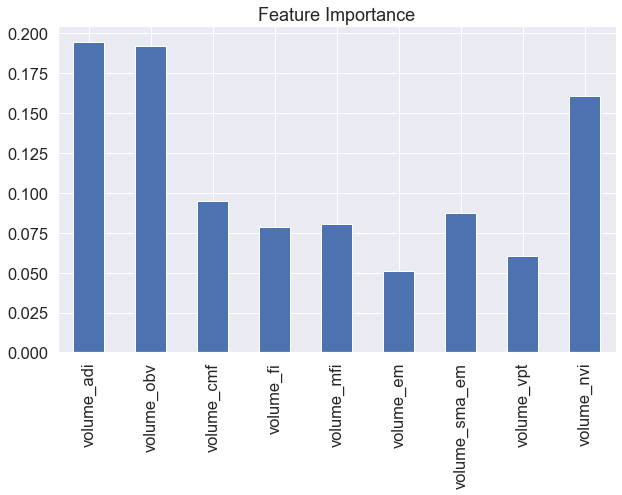

In [5]:
# 
generate_report(X_train, X_test, y_train, y_test)

## Past reports

Model score: 0.9805555555555555
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5475
           1       0.98      0.62      0.76       285

    accuracy                           0.98      5760
   macro avg       0.98      0.81      0.87      5760
weighted avg       0.98      0.98      0.98      5760

===========CROSS VALIDATED METRICS===========
accuracy: 0.755625
precision: 0.2614708968040794
recall: 0.2556112078977933
f1: 0.08019874724024974
Fact sheet:
Accuracy:
Precision: Portion of guessed positives that are actually correct
Recall: Portion of actual positives that are guessed correct
F1: Balance, use if uneven class distribution (ie large # actual negatives)
===========FEATURE IMPORTANCE===========


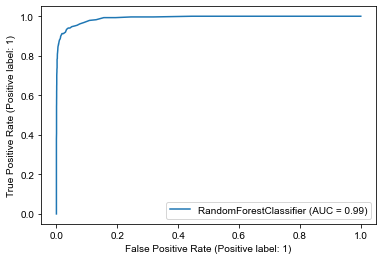

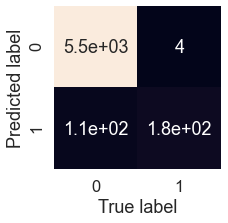

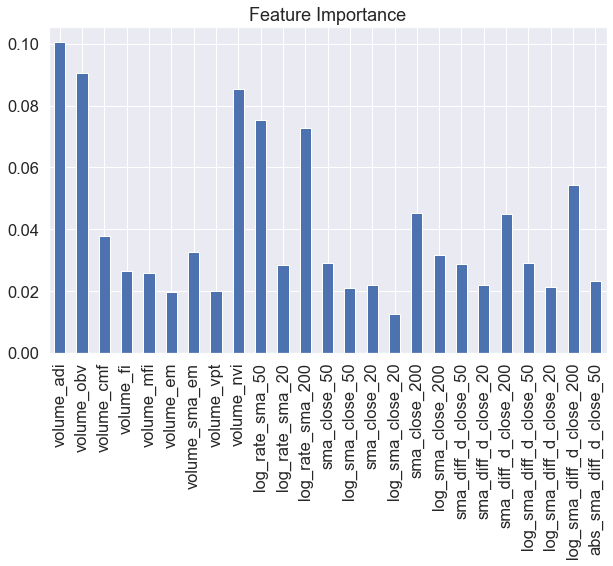

In [5]:
# SMA Analysis + Volume analysis
generate_report(X_train, X_test, y_train, y_test)

Model score: 0.9640625
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5475
           1       0.94      0.29      0.45       285

    accuracy                           0.96      5760
   macro avg       0.95      0.65      0.71      5760
weighted avg       0.96      0.96      0.95      5760

===========CROSS VALIDATED METRICS===========
accuracy: 0.9356250000000002
precision: 0.14149963865126186
recall: 0.05499903213317847
f1: 0.07385725755280738
===========FEATURE IMPORTANCE===========


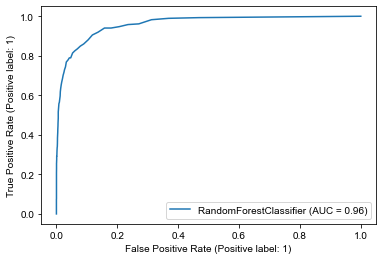

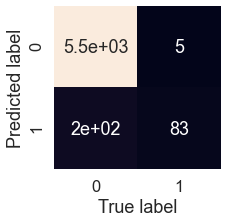

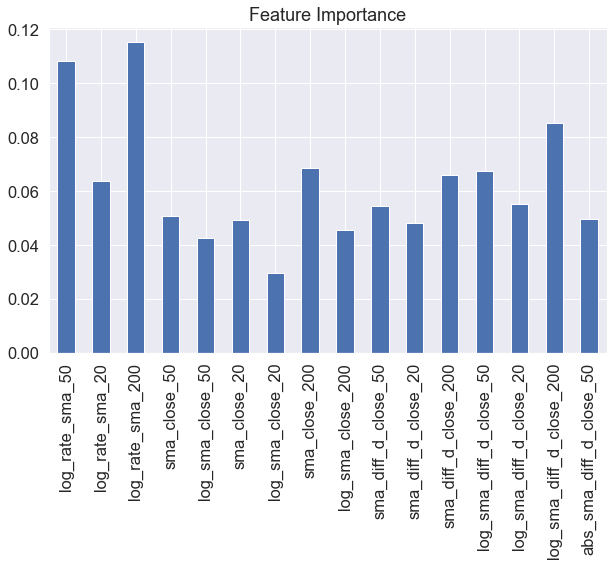

In [5]:
# SMA Analysis
generate_report(X_train, X_test, y_train, y_test)

## Forward testing

In [41]:
a = [1, 2, 3, 4, 5]
a[-3:]

[3, 4, 5]

In [14]:
# Forward test
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9739655172413794

In [37]:
results = model.predict(df_ft.drop(["target", "close"], axis=1))
df_ft["results"] = results

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [27]:
# df_ft["scatter_results"] = list(map(lambda x, c: c if x == 1 else None, df_ft["results"], df_ft["close"]))
df_ft["scatter_results"] = list(map(lambda x, c: c if x == 1 else None, df_ft["results"], close["close"]))

# df_ft["s_correct"] = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, df_ft["results"], df_ft["target"], df_ft["close"]))
# df_ft["s_wrong"] = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, df_ft["results"], df_ft["target"], df_ft["close"]))
# df_ft["s_missed"] = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, df_ft["results"], df_ft["target"], df_ft["close"]))


In [34]:
plot = df_ft[:]

<ipython-input-34-b8940c020d3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot["close"] = close["close"]


,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,target,results,scatter_results,close
29000,2.805378e+06,189993.662342,0.335110,79573.940177,73.048749,3.859222e+08,1.129732e+08,28.067068,1.079899e+06,0,0,None,19455.06
29001,2.801506e+06,195049.345842,0.183216,71030.194793,82.004229,2.778314e+08,1.366540e+08,10.133392,1.079899e+06,0,0,None,19458.97
29002,2.802201e+06,196983.946839,0.195988,66612.206775,75.806148,-2.128119e+08,1.022995e+08,3.077037,1.081049e+06,0,0,None,19479.70
29003,2.799393e+06,193804.220598,0.104142,-78719.015450,66.723465,-1.414876e+09,-9.607526e+06,-46.744013,1.081049e+06,0,0,None,19180.71
29004,2.798539e+06,189820.176934,0.084785,-94969.034586,55.247670,-9.178038e+08,-9.515195e+07,-58.839495,1.081049e+06,0,0,None,19132.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32457,3.749967e+06,651846.660352,-0.089334,-838201.384571,55.679210,-1.563057e+10,7.656146e+08,-128.021424,3.397758e+06,0,0,None,57599.87
32458,3.753507e+06,656586.000023,-0.014589,-189500.628952,57.742937,-3.565743e+09,-1.555239e+08,-69.377476,3.443845e+06,0,0,None,58381.14
32459,3.756053e+06,660401.391292,0.031060,119822.634432,59.108266,1.348046e+10,4.377286e+08,98.125673,3.474391e+06,0,0,None,58898.98
32460,3.755790e+06,663338.430698,0.045276,170504.572030,59.602311,5.726022e+09,6.828207e+08,41.900274,3.483923e+06,0,0,None,59060.57


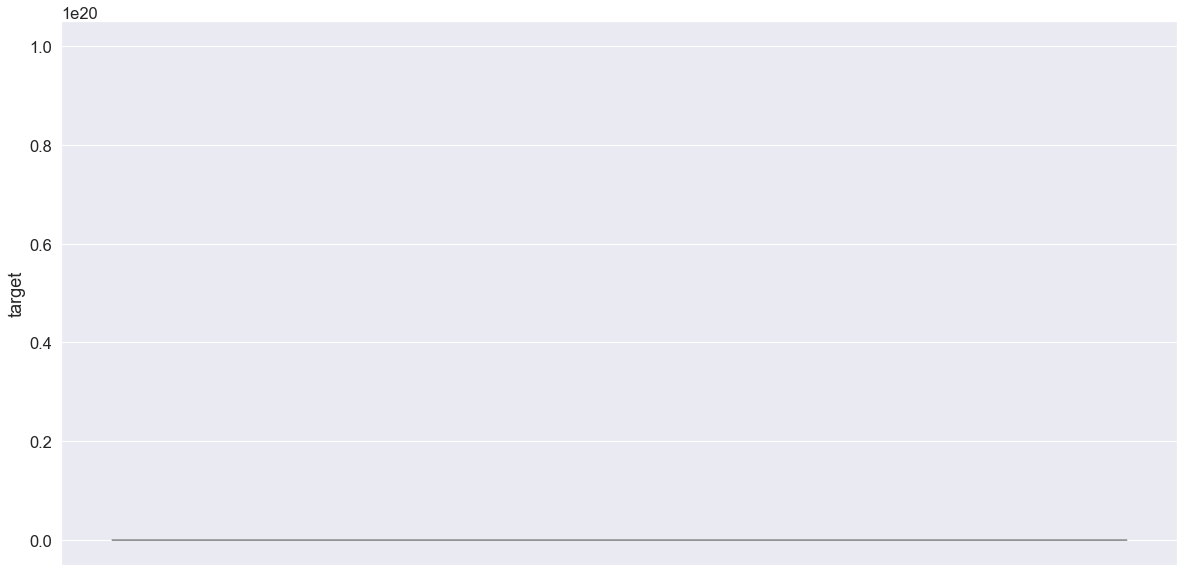

In [35]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.scatter(range(len(plot)), 
           plot.scatter_results,
        color="#43aa8b")

# ax.scatter(range(len(plot)), 
#            plot.s_missed,
#         color="#f9c74f")

# ax.scatter(range(len(plot)), 
#            plot.s_correct,
#         color="#43aa8b")

# ax.scatter(range(len(plot)), 
#            plot.s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

# Scatter
ax.plot(range(len(plot)),
         plot.close,
         color="gray")


# ax2=ax.twinx()
# ax2.plot(range(len(plot)),
#          plot.close,
#          color="gray")
# ax2.set_ylabel("close")

# ax3=ax.twinx()
# ax3.plot(plot.target,
#          color="white")
# ax3.set_ylabel("close")
plt.show()